<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laplace transform**

## *Definition*

The Laplace transform is 

---
$$
\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s 
$$




## Khan Academy:
[link text](https://pt.khanacademy.org/math/differential-equations/laplace-transform/laplace-transform-tutorial/v/laplace-transform-1?modal=1)

## $${Tabelas}$$

*Time functions*

In [ ]:
functions 
[1, t, e , te , te , sinωt , cosωt , 1 − e , e sin ωt , e cos ωt
−at −at 2 −at
( ) ( )
−at −at
( )
−at
( )]


SyntaxError: ignored

In [ ]:
[1, t, e , te , t e , sin ωt , cos ωt , 1 − e , e sin ωt , e cos ωt
−at −at 2 −at
( ) ( )
−at −at
( )
−at
( )]

SyntaxError: ignored

 *Laplace transform - frequency domain*

In [ ]:
import numpy as np
import sympy
sympy.init_printing()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's define some symbols to work with. 

In [ ]:
t, s = sympy.symbols('t, s')
a,w    = sympy.symbols("a,w") 

We start with a simple function

In [ ]:
g = sympy.sin(w*t)
f = sympy.exp(-a*t)
f,g

### Library function



Sympy provides a function called `laplace_transform` which does this more efficiently. By default it will return conditions of convergence as well (recall this is an improper integral, with an infinite bound, so it will not always converge).

In [ ]:
sympy.laplace_transform(f, t, s)

If we want just the function, we can specify `noconds=True`.

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

We will find it useful to define a quicker version of this:

In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

Exemplos

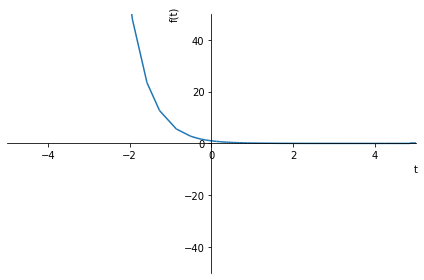

In [ ]:
## Exemplos

f = sympy.exp(-2*t)
sympy.plot(f,xlim=(-5, 5), ylim=(-50, 50))
f

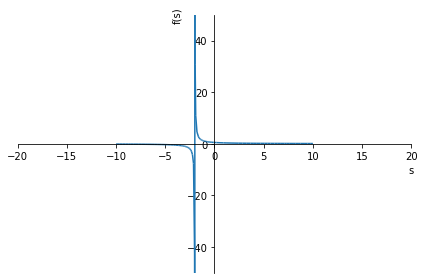

In [ ]:
sympy.plot(L(f), xlim=(-20, 20), ylim=(-50, 50))
f,L(f)

In [ ]:
from ipywidgets import interact
def trans(A,tetha):
  f = A*sympy.sin(t - tetha)
  sympy.plot(f,xlim=(-10, 10), ylim=(-10, 10))
  plt.show()
  return f

In [ ]:
f = interact(trans, A =(0, 10), tetha =(0, 10))

interactive(children=(IntSlider(value=5, description='A', max=10), IntSlider(value=5, description='tetha', max…

### Reproducing standard transform table

Let's see if we can match the functions in the table

In [ ]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

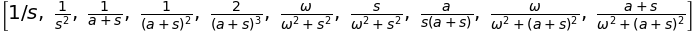

In [ ]:
Fs = [L(f) for f in functions]
Fs

## Properties

#### 1. Linearity

$
    \ aL(f1)+bL(f2) = L(af1 + bf2) \
$

$a,b\in R $

In [ ]:
# Linearity
f1 = sympy.exp(-3*t)
f2 = sympy.exp(-5*t)
5*L(f1)+4*L(f2) , L(5*f1 + 4*f2).apart(s)

#### 2. time transposing 
$ L(f(t-a))  = e^{-a}L(f(t))$

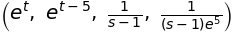

In [ ]:
# Time translaction
f1 = sympy.exp(t)
f2 = sympy.exp(t-5)
f1,f2,L(f1),L(f2)

#### 3. Frequency tranlaction

$ L(e^{-at}f(t)) = F( s + a)$

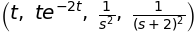

In [ ]:
# Frequence 
f1 = t
f1, L(f1)
f2 = sympy.exp(-2*t)*f1
f1,f2,L(f1),L(f2)

### 4. Integral Theorem
$ L(f'(t)) = sL(f(t))$


In [ ]:
def der(f):
  return sympy.diff(f)

In [ ]:
f1 = sympy.sin(2*t)
f1, der(f1)

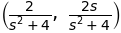

In [ ]:
L(f1),L(der(f1))

### 5. Initial value
$\lim_{t\to\infty} f(t) = \lim_{s\to 0} sF(s)$

In [ ]:
f3 = 2 - 3*sympy.exp(-t)
p = sympy.plot(f3,invL(f3), show=False)
p[1].line_color = 'red'
p.show()
f3,L(f3)

NameError: ignored

## Inverse Transform

### What is that θ?

The unit step function is also known as the Heaviside step function. We will see this function often in inverse laplace transforms. It is typeset as $\theta(t)$ by sympy.

Look at the difference between $f$ and the inverse laplace transform we obtained, which contains the unit step to force it to zero before $t=0$.

In [ ]:
sympy.Heaviside(t)

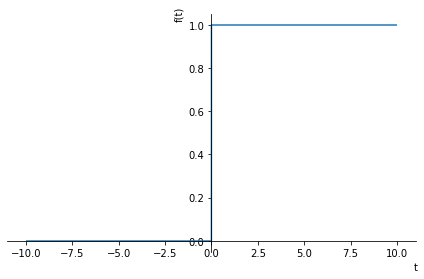

In [ ]:
sympy.plot(sympy.Heaviside(t));

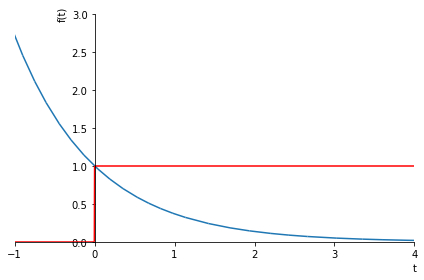

In [ ]:
f = sympy.exp(-t)
p = sympy.plot(f,sympy.Heaviside(t), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p.show()
f*sympy.Heaviside(t)

In [ ]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
F = 1/(s+2)
F,invL(F)

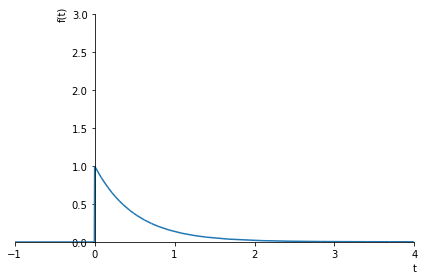

In [ ]:

sympy.plot(invL(F),xlim=(-1, 4), ylim=(0, 3))
F,invL(F)

### More complicated inverses

Why doesn't the table feature more complicated functions? Because higher-order rational functions can be written as sums of simpler ones through application of partial fractions expansion.

In [ ]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))

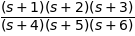

In [ ]:
F

In [ ]:
F.apart(s)

Even sympy can benefit from a little help sometimes. When we try to calculate the inverse of $F$ we get a bit of a nasty answer:

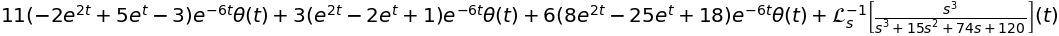

In [ ]:
invL(F)

Perhaps it looks better if we simplify?

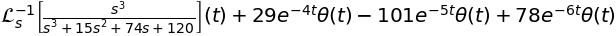

In [ ]:
invL(F).simplify()

No, it still features an "unknown" laplace transform. If we do the partial fractions expansion first, we get a clean answer:

In [ ]:
invL(F.apart(s)).simplify()

## Atividade 1: 
Encontre as Transformadas de Laplace e mostre os graficos das funções
1.   $f(t) = 5e^{-t}  $

2.   $f(t) = 2e^{-t/2}  $

3.    $f(t) = t^{2}  $

4.   $f(t) = e^{-t}\mathcal{cos} (3t) $

5.   $f(t) = \mathcal{cosh} (t) $

In [ ]:
import numpy as np
import sympy
sympy.init_printing()

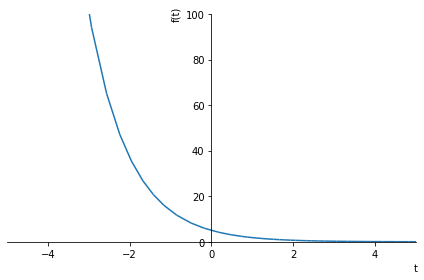

In [ ]:
# coloque aqui seu código
f1 = 5*sympy.exp(-(t))
sympy.plot(f1, xlim=(-5, 5), ylim=(0, 100))
f1


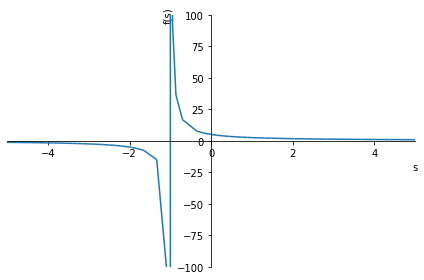

In [ ]:
F1 = L(f1)
sympy.plot((F1), xlim=(-5,5), ylim=(-100,100))
F1

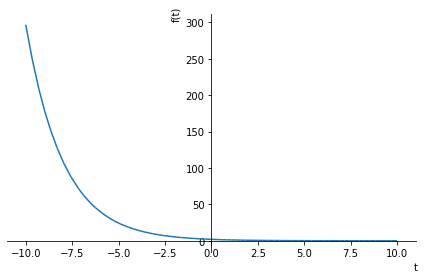

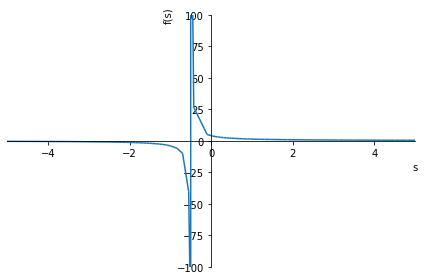

In [ ]:
f2 = 2*sympy.exp(-t/2)
sympy.plot(f2)
f2
F2 = L(f2)
sympy.plot((F2), xlim=(-5,5), ylim=(-100,100))
F2

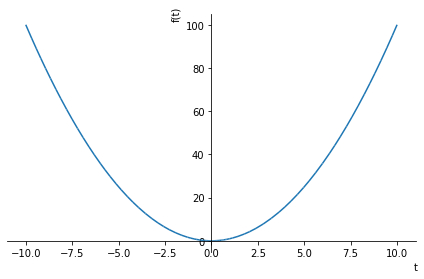

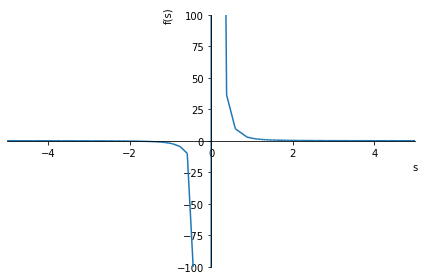

In [ ]:
f3 = t**2
sympy.plot(f3)
f3
F3 = L(f3)
sympy.plot((F3), xlim=(-5,5), ylim=(-100,100))
F3

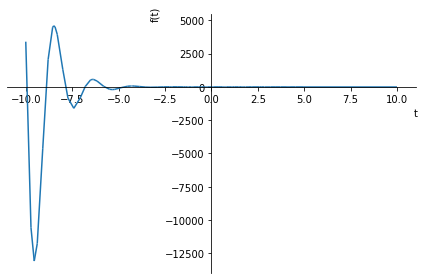

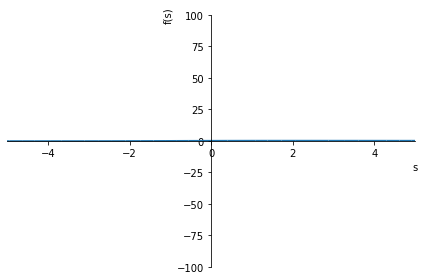

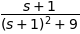

In [ ]:
f4 = sympy.exp(-t)*sympy.cos(3*t)
sympy.plot(f4)
f4
F4 = L(f4)
sympy.plot((F4), xlim=(-5,5), ylim=(-100,100))
F4


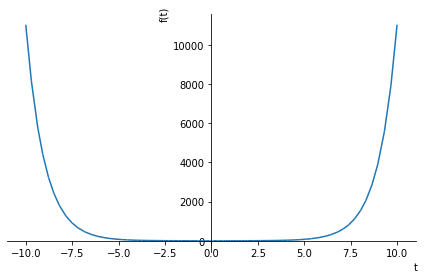

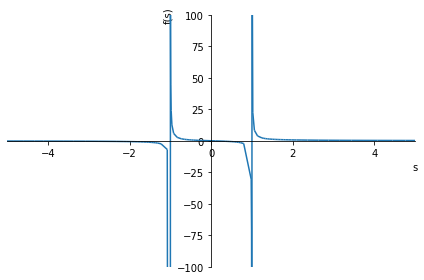

In [ ]:
f5 = sympy.cosh(t)
sympy.plot(f5)
f5
F5 = L(f5)
sympy.plot((F5), xlim=(-5,5), ylim=(-100,100))
F5

## Atividade 2:
Encontre as transformadas inversas das funções, e mostre os graficos


1. $\ F(s) = \frac{5}{s(s+2)}$
2. $ \ F(s) = \frac{12}{s^{2}+7s+12}$
3. $ \ F(s) = s+2 - \frac{s+3}{(s+1)(s+2)}$
4. $ \ F(s) = \frac{10}{ s^{2}+2s+10 }$



In [ ]:
print("ALUNO:\n Bruno")

ALUNO:
 Bruno


	Questão 1:



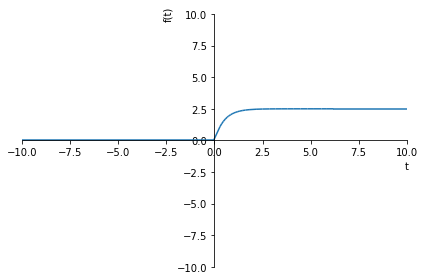

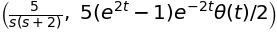

In [ ]:
print ('\tQuestão 1:\n')
F = 5/(s*(s+2))
sympy.plot(invL(F), xlim=(-10, 10), ylim=(-10, 10))
F,invL(F)


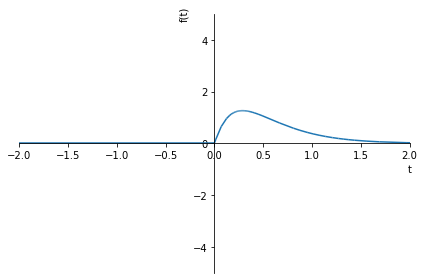

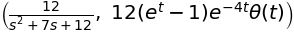

In [ ]:
# Inversa Laplace F2
F = 12/((s**2)+(7*s)+12)
sympy.plot(invL(F), xlim=(-2, 2), ylim=(-5, 5))
F,invL(F)

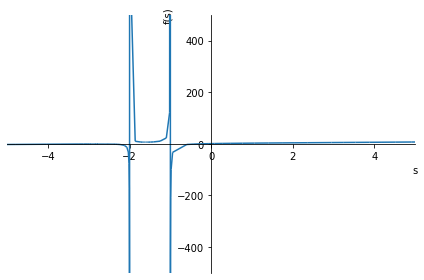

Devido a resposta ser um número complexo, não é possível plotar o gráfico da inversa


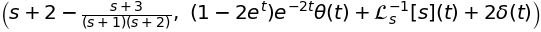

In [ ]:
# Inversa Laplace F3
F= s + 2 - ((s+3)/((s+1)*(s+2)))
sympy.plot(F,xlim=(-5, 5), ylim=(-500, 500))
print( "Devido a resposta ser um número complexo, não é possível plotar o gráfico da inversa")
F,invL(F)



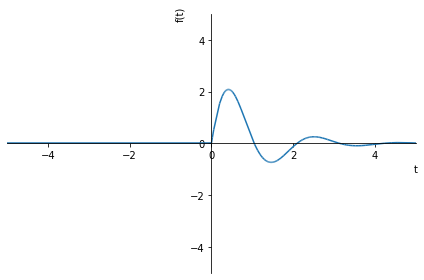

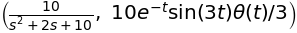

In [ ]:
# Inversa Laplace F4
F = 10/((s**2)+(2*s)+10)
sympy.plot(invL(F),xlim=(-5, 5), ylim=(-5, 5))
F,invL(F)


## Atividade 3:
*As respostas calculadas computacionalmente coincidiram com os valores calculados analiticamente ( nos videos ) ?* 

*Em que as respostas diferem e porque ?*




A. Não. Nos videos, as funções representadas por meio da inversa de Laplace continuam com seus valores em t<0.


B. Foi utilizada a função HEAVISIDE, sendo uma função matematica, na qual, quando em uso de simulações númericas, "força" todos os valores para t<0 a 0, e para todos os valores em t>0 a serem representados por um valor "unitário".